# **r ploting intergenic**

In [9]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(reshape2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘tidyr’ was built under R version 3.6.3”
Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



## **human intergenic**

In [10]:
inter_data <- read.csv("data/humanIntergenic/data_df_5kbp.csv")
inter_data <- inter_data[,2:98] #gets rid of the row names col 

In [11]:
inter_avMut <- apply(inter_data[,2:97],1,mean) #need to specify those rows so the "gens" col doesnt get included in the mean apply 

In [12]:
inter_sdMut <- apply(inter_data[,2:97],1,sd)#need to specify those rows so the "gens" col doesnt get included in the sd apply 

In [13]:
inter_data$avMut <- inter_avMut
inter_data$sdMut <- inter_sdMut
inter_data$stderrMut <- inter_data$sdMut/10

## **triplet frequency replicated**

In [14]:
triprep_data <- read.csv("data/tripletFreqRep/data_df_5kbp.csv")
triprep_data <- triprep_data[,2:101]

In [15]:
triprep_avMut <- apply(triprep_data[,2:100],1,mean)
triprep_sdMut <- apply(triprep_data[,2:100],1,sd)

In [16]:
triprep_data$avMut <- triprep_avMut
triprep_data$sdMut <- triprep_sdMut
triprep_data$stderrMut <- triprep_data$sdMut/10 # n samples = 100 . sqrt 100 = 10 

## **true random** 

In [17]:
random_data <- read.csv("data/trueRandom/data_df_5kbp.csv")
random_data <- random_data[,2:101]

In [18]:
random_data$avMut <- apply(random_data[,2:100],1,mean)
random_data$sdMut <- apply(random_data[,2:100],1,sd)
random_data$stderrMut <- random_data$sdMut / 10 

## **plotting all together** 

In [19]:
dim(random_data[1:9996,])
dim(triprep_data)
dim(inter_data)

[1] 9996  103

[1] 9996  103

[1] 10000   100

In [20]:
#combine all data into one 
all_data <- random_data[1:9996,c("gens","avMut","sdMut","stderrMut")] 
colnames(all_data) <- c("gens","random_avMut","random_sdMut","random_stderrMut")

all_data$triprep_avMut <- triprep_data$avMut
all_data$triprep_sdMut <- triprep_data$sdMut
all_data$triprep_stderrMut <- triprep_data$stderrMut

all_data$inter_avMut <- inter_data$avMut[1:9996]
all_data$inter_sdMut <- inter_data$sdMut[1:9996]
all_data$inter_stderrMut <- inter_data$stderrMut[1:9996]

In [21]:
write.csv(all_data,"data/all_data_df_avMut_stderr.csv")

 folowing tutorial at https://stackoverflow.com/questions/64391103/ggplot2-make-multiple-lineribbons-with-legend

In [22]:
test_data <- all_data[,c("gens","random_avMut","triprep_avMut","inter_avMut")]

In [23]:
tail(test_data)

,gens,random_avMut,triprep_avMut,inter_avMut
9991,9990,2.935609e-05,2.925512e-05,2.922453e-05
9992,9991,2.936283e-05,2.925276e-05,2.922184e-05
9993,9992,2.936655e-05,2.924471e-05,2.922766e-05
9994,9993,2.936398e-05,2.924818e-05,2.921987e-05
9995,9994,2.936052e-05,2.924182e-05,2.922479e-05
9996,9995,2.936349e-05,2.923281e-05,2.921798e-05


In [15]:
test_data$random_lo <- all_data$random_avMut-all_data$random_stderrMut
test_data$random_hi <- all_data$random_avMut+all_data$random_stderrMut

test_data$triprep_lo <- all_data$triprep_avMut-all_data$triprep_stderrMut
test_data$triprep_hi <- all_data$triprep_avMut+all_data$triprep_stderrMut

test_data$inter_lo <- all_data$inter_avMut-all_data$inter_stderrMut
test_data$inter_hi <- all_data$inter_avMut+all_data$inter_stderrMut

In [16]:
long_test_data <- pivot_longer(test_data, cols=!gens , names_to="line" , values_to="avMut" )

In [17]:
long_test_data$fill = NA
long_test_data$fill[grep( "random" , long_test_data$line  )] = "random"
long_test_data$fill[grep( "triprep" , long_test_data$line  )] = "triprep"
long_test_data$fill[grep( "inter" , long_test_data$line  )] = "inter"

In [18]:
long_test_data1 <- long_test_data %>% 
    mutate(line = gsub("inter_", "", line)) %>% 
    mutate(line = gsub("random_", "", line)) %>% 
    mutate(line = gsub("triprep_", "", line)) %>% 
    pivot_wider(id_cols = c(gens, fill), names_from = line, values_from = avMut)

In [19]:
head(long_test_data1)

gens,fill,avMut,lo,hi
0,random,6.157891e-05,6.140923e-05,6.174859e-05
0,triprep,3.797823e-05,3.786833e-05,3.808813e-05
0,inter,3.366473e-05,3.318564e-05,3.414381e-05
1,random,6.150819e-05,6.133946e-05,6.167691e-05
1,triprep,3.794659e-05,3.783760e-05,3.805559e-05
1,inter,3.364314e-05,3.316516e-05,3.412111e-05


Saving 6.67 x 6.67 in image


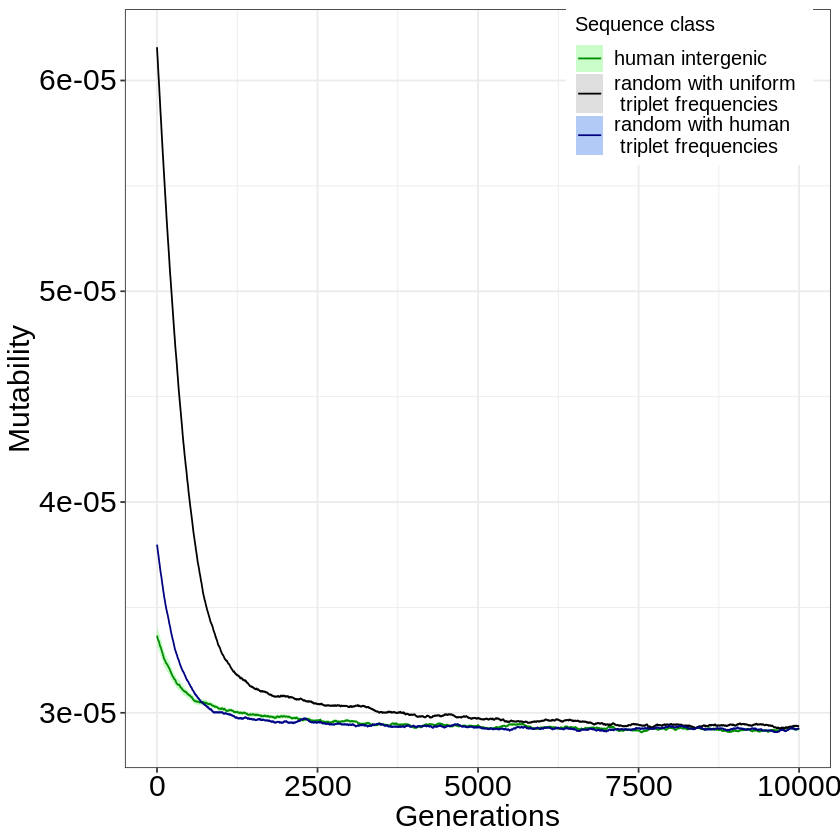

In [30]:
ggplot(long_test_data1) +
    geom_ribbon(aes(x=gens, ymin=lo, ymax=hi, fill = fill), alpha=0.5) +
    geom_line(aes(x=gens, y=avMut, color = fill)) +
    labs( y="Mutability" , x="Generations",color="Sequence class",fill="Sequence class")+
    scale_color_manual(labels=c(random = "random with uniform \n triplet frequencies", triprep = "random with human \n triplet frequencies", inter="human intergenic"),values = c(random = "black", triprep = "navy", inter="green4")) + 
    scale_fill_manual(labels=c(random = "random with uniform \n triplet frequencies", triprep = "random with human \n triplet frequencies", inter="human intergenic"),values = c(random = "grey", triprep = "cornflowerblue", inter="palegreen"))+
#     ylim(2.9e-05, 3.6e-05)+
    theme_bw()+
    theme(
        legend.position = c(0.8,0.9),
        axis.text = element_text(size = 18, family = 'Helvetica', color = 'black'),
        axis.title = element_text(size = 18, family = 'Helvetica'),
        legend.title = element_text(size=12, family = 'Helvetica'),
        legend.text = element_text(size = 12, family = 'Helvetica')
       
    ) # http://www.sthda.com/english/wiki/ggplot2-legend-easy-steps-to-change-the-position-and-the-appearance-of-a-graph-legend-in-r-software
ggsave(paste("plots/allSeqClass_100n_5kbp_2xCov_stderr_Apprisal",toString(Sys.Date()),".pdf",sep=""))